Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:

    geo_comment.xlsx
        comment - комментарий одного или списка жителей к проект
        multiplier - количество авторов комментария (может быть 1, может быть список)
        x, y - координаты адреса, по которому был дан определённой комментарий
        comment_class - за (1) / против (-1)
    geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть multiplier > 1 голоса)
        x, y - координаты адреса, по которому был дан определённой комментарий
        comment_class - за (1) / против (-1)

Обязательное задание

    визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
    аналогично исследовать скопления голосов за и против отдельно
    подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
    приложить ноутбук

Дополнительные задания

    найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')
    для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [5]:
scaler = StandardScaler()

In [6]:
df = data[['x', 'y']]
X_scaled = scaler.fit_transform(df)

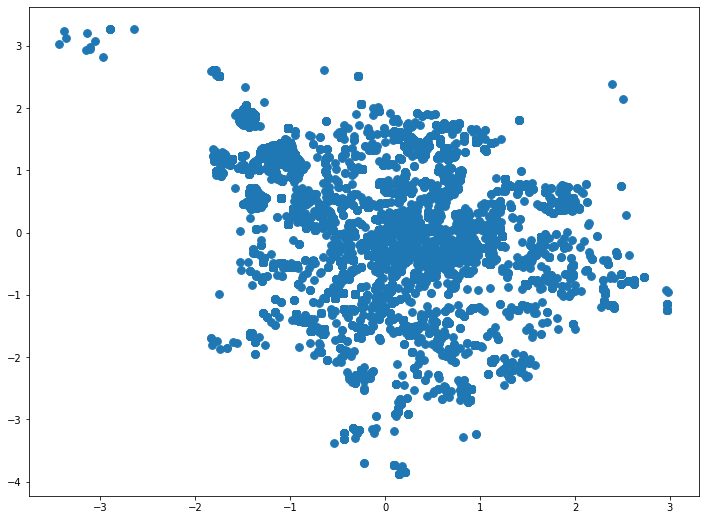

In [7]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=60)

In [8]:
from sklearn.cluster import KMeans

Разделим на пять кластеров

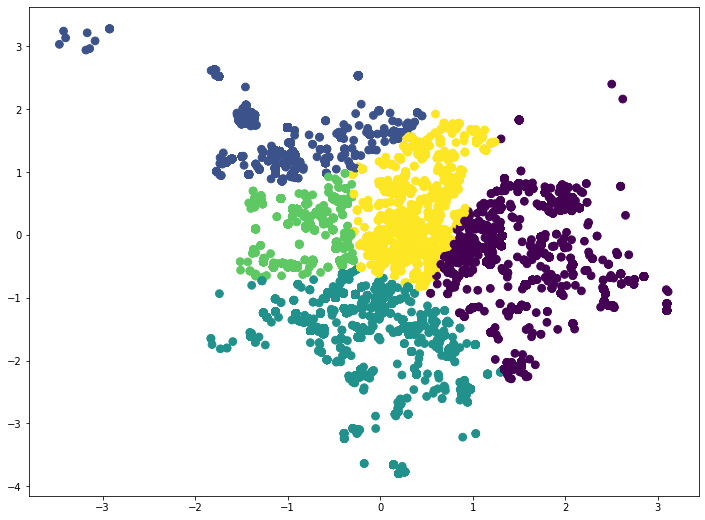

In [29]:
cl = KMeans(n_clusters=5).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

Расчитаем оптимальное число кластеров

In [14]:
def optimal_clasters(X_scaled, model):
    
    k_inertia = []
    ks = range(1,15)

    for k in ks:
        algorithm = model(n_clusters=k)
        clusters_ = algorithm.fit_predict(X_scaled)
        k_inertia.append(algorithm.inertia_)

    plt.plot(ks, k_inertia)
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_opt = ks[np.argmin(diff_r)+1]
    print(f"оптимальное количество кластеров: {k_opt}")

оптимальное количество кластеров: 3


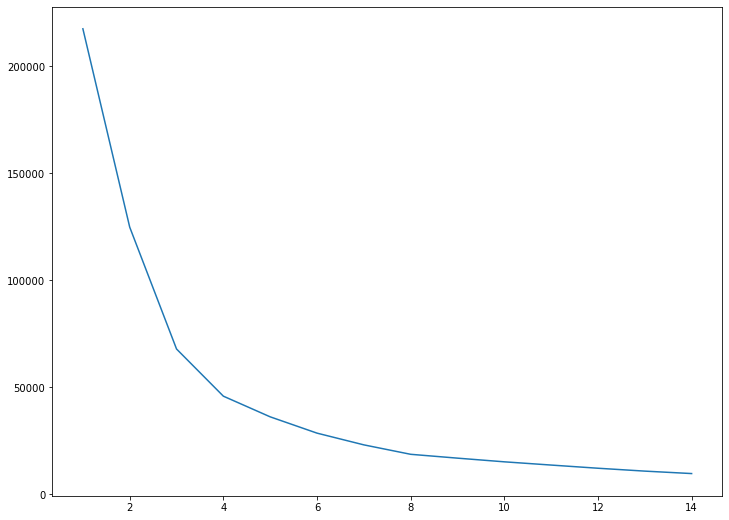

In [15]:
optimal_clasters(X_scaled, KMeans)

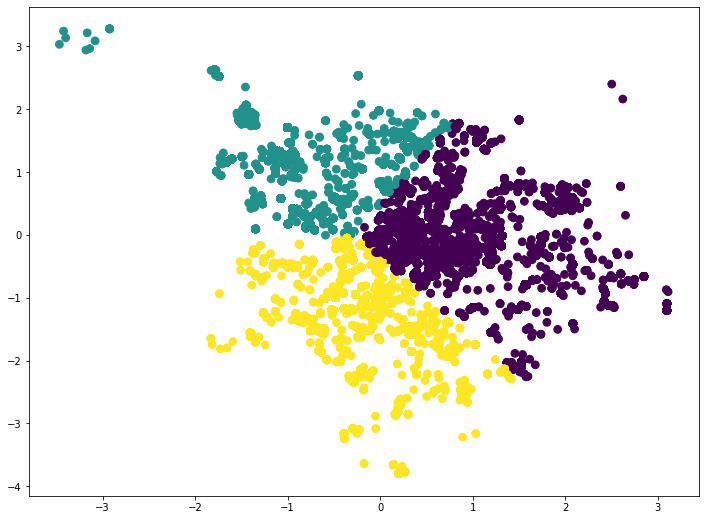

In [30]:
cl = KMeans(n_clusters=3).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

Теперь исследуем скопления голосов за и против

In [33]:
#выполним те же операции для ответов 'за'
df1 = data[data['comment_class'] == 1][['x', 'y']]
X_scaled = scaler.fit_transform(df1)

оптимальное количество кластеров: 3


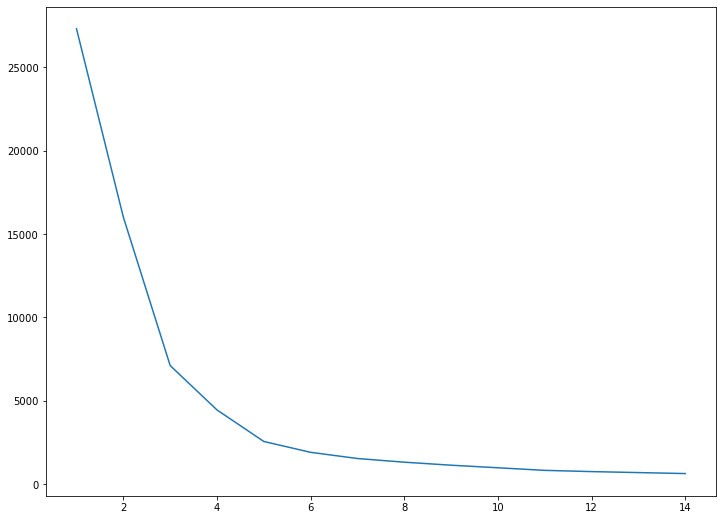

In [19]:
optimal_clasters(X_scaled, KMeans)

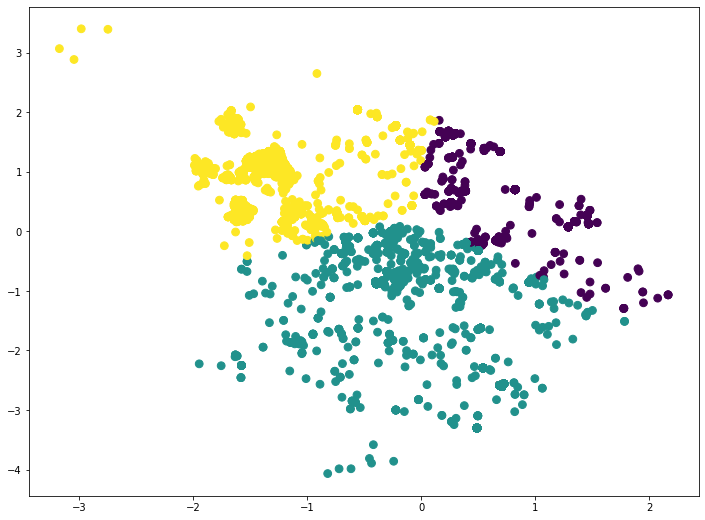

In [34]:
cl = KMeans(n_clusters=3).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

In [22]:
#выполним те же операции для ответов 'против'
df2 = data[data['comment_class'] == -1][['x', 'y']]
X_scaled = scaler.fit_transform(df2)

оптимальное количество кластеров: 3


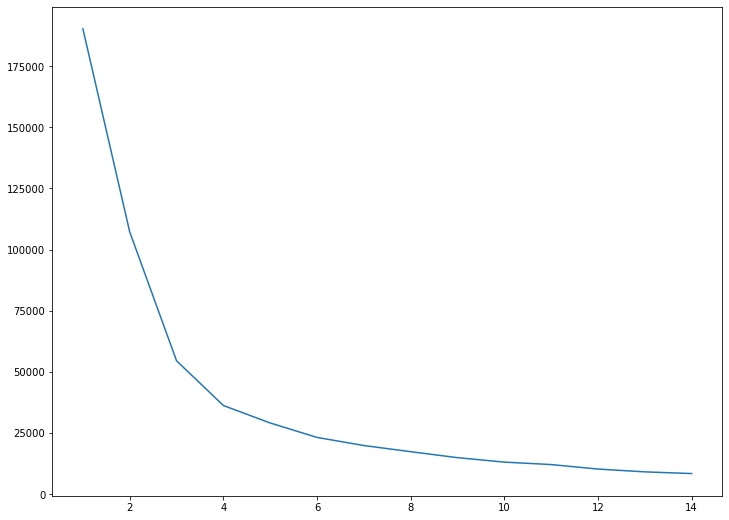

In [23]:
optimal_clasters(X_scaled, KMeans)

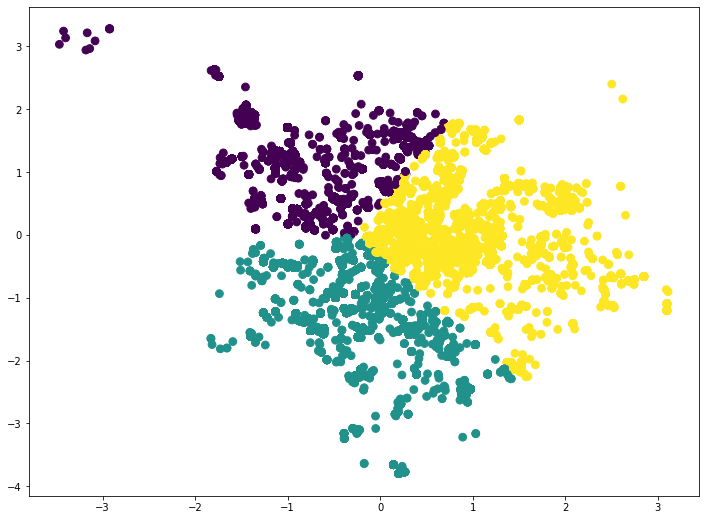

In [32]:
cl = KMeans(n_clusters=3).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)